<a href="https://colab.research.google.com/github/felipedebiazi/Formacao-Machine-Learning-Specialist-DIO/blob/main/Treinamento_de_Redes_Neurais_com_Transfer_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf
import tensorflow_datasets as tfds
import pathlib

In [41]:
# Directory to dataset in drive
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

dataset_path = '/content/gdrive/MyDrive/Dataset_Fotos/felipe-monica/'

Mounted at /content/gdrive


In [42]:
data_dir = pathlib.Path('/content/gdrive/MyDrive/Dataset_Fotos/felipe-monica/') 
image_count = len(list(data_dir.glob('*/*.jpg')))
image_count2 = len(list(data_dir.glob('*/*.jpeg')))
print(image_count + image_count2)

169


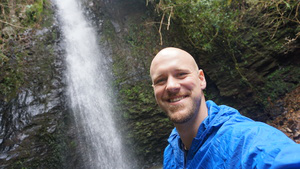

In [43]:
felipe = list(data_dir.glob('Felipe/*'))
PIL.Image.open(str(felipe[0]))

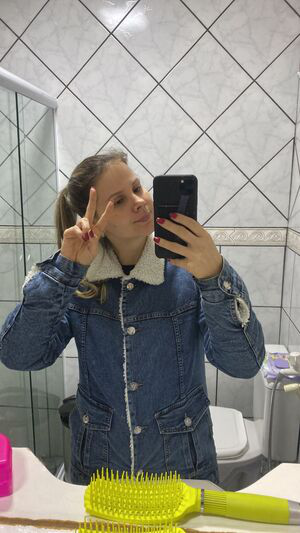

In [44]:
monica = list(data_dir.glob('Monica/*'))
PIL.Image.open(str(monica[21]))

In [45]:
batch_size = 32
img_height = 180
img_width = 180

In [46]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 169 files belonging to 2 classes.
Using 136 files for training.


In [47]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 169 files belonging to 2 classes.
Using 33 files for validation.


In [48]:
class_names = train_ds.class_names
print(class_names)

['Felipe', 'Monica']


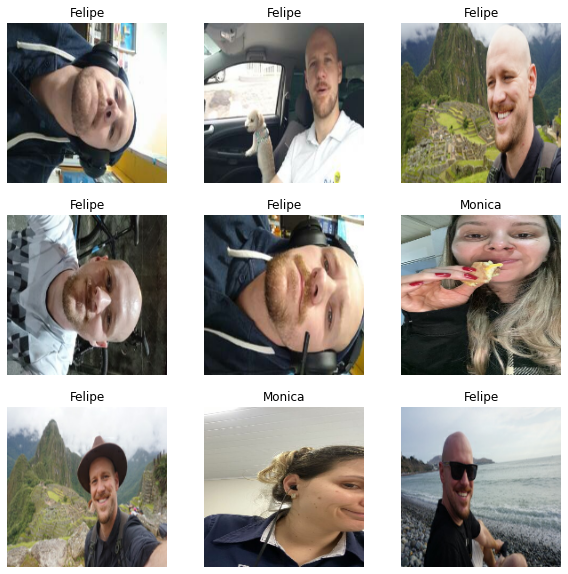

In [49]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [50]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32,)


In [51]:
normalization_layer = tf.keras.layers.Rescaling(1./255)

In [52]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 1.0


In [53]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [54]:
num_classes = 2

model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])

In [55]:
model.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [56]:
model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=4
)

Epoch 1/4
5/5 [==============================] - 6s 1s/step - loss: 0.9562 - accuracy: 0.6029 - val_loss: 0.7000 - val_accuracy: 0.5758
Epoch 2/4
5/5 [==============================] - 6s 1s/step - loss: 0.7347 - accuracy: 0.4779 - val_loss: 0.6887 - val_accuracy: 0.5758
Epoch 3/4
5/5 [==============================] - 7s 1s/step - loss: 0.6934 - accuracy: 0.5147 - val_loss: 0.6867 - val_accuracy: 0.6061
Epoch 4/4
5/5 [==============================] - 6s 1s/step - loss: 0.6775 - accuracy: 0.7059 - val_loss: 0.6749 - val_accuracy: 0.5758


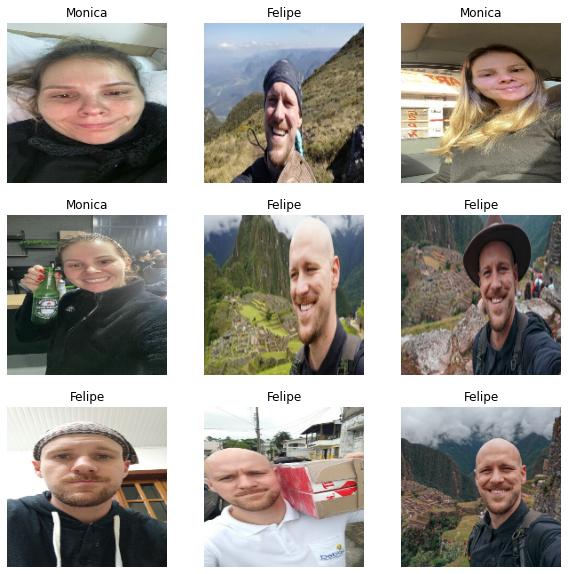

In [57]:
image_batch, label_batch = next(iter(train_ds))

plt.figure(figsize=(10, 10))
for i in range(9):
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(image_batch[i].numpy().astype("uint8"))
  label = label_batch[i]
  plt.title(class_names[label])
  plt.axis("off")

In [58]:
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.RandomFlip('horizontal'),
  tf.keras.layers.RandomRotation(0.2),
])

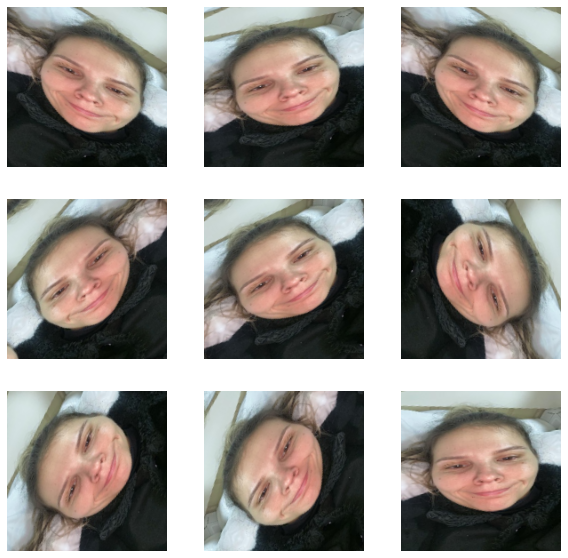

In [59]:
for image, _ in train_ds.take(1):
  plt.figure(figsize=(10, 10))
  first_image = image[0]
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    augmented_image = data_augmentation(tf.expand_dims(first_image, 0))
    plt.imshow(augmented_image[0] / 255)
    plt.axis('off')

In [62]:
epochs = 5
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/5
5/5 [==============================] - 6s 1s/step - loss: 0.5132 - accuracy: 0.7132 - val_loss: 0.6733 - val_accuracy: 0.6970
Epoch 2/5
5/5 [==============================] - 5s 948ms/step - loss: 0.3959 - accuracy: 0.8088 - val_loss: 0.7152 - val_accuracy: 0.5758
Epoch 3/5
5/5 [==============================] - 5s 942ms/step - loss: 0.2868 - accuracy: 0.8971 - val_loss: 0.8359 - val_accuracy: 0.6667
Epoch 4/5
5/5 [==============================] - 5s 952ms/step - loss: 0.3298 - accuracy: 0.8235 - val_loss: 0.7276 - val_accuracy: 0.7273
Epoch 5/5
5/5 [==============================] - 5s 948ms/step - loss: 0.2439 - accuracy: 0.9118 - val_loss: 0.7613 - val_accuracy: 0.6970


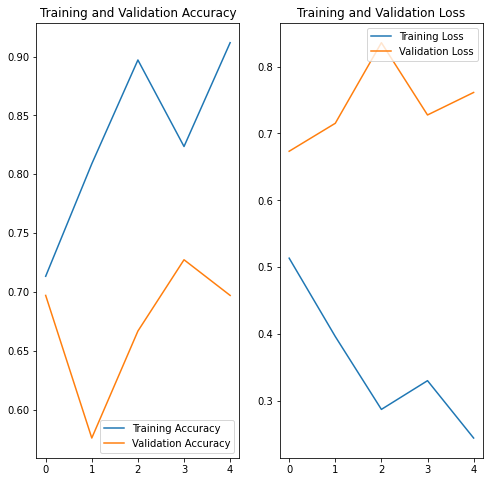

In [63]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()